In [68]:
import numpy as np, pandas as pd

In [69]:
df = pd.read_csv("train.csv")

In [70]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


## Reading and understand the data

In [71]:
df.shape

(69999, 172)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [73]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [74]:
og = df.copy()

In [75]:
# create list of coloumns for recharge (total,av,max)
zeroimpute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [76]:
# function to replace missing values in recharg coloumns with zero

df[zeroimpute] = df[zeroimpute].apply(lambda x: x.fillna(0))

In [77]:
print(df[zeroimpute].isnull().sum()*100/df.shape[1])

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
dtype: float64


In [78]:
# List the columns having more than 70% missing values
col_list_missing_70 = list(df_missing_columns.index[df_missing_columns['null'] > 70])

In [79]:
col_list_missing_70

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [80]:
# Delete the columns having more than 70% missing values
df = df.drop(col_list_missing_70, axis=1)

In [81]:
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,0,0,0,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,1,0,0,0,0,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,0,0,0,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,0,0,0,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,0,0,0,1,0,647,0.0,0.0,0.0,0


In [82]:
df.shape

(69999, 142)

# Deleting the date columns as the date columns are not required in our analysis

In [83]:
datecol=['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']

In [84]:
# Dropping date columns
df = df.drop(datecol, axis=1)

In [85]:
 df.shape

(69999, 136)

In [86]:
## Drop circle_id column (as this is uniques value)
df = df.drop('circle_id', axis=1)

In [87]:
# look at missing value ratio in each column
df.isnull().sum()*100/df.shape[0]

id                   0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
arpu_6               0.000000
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 135, dtype: float64

In [88]:
df.columns[df.isnull().any()]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

# Find high-value customers

In [89]:
## Creating column avg_rech_amt_6_7 by summing up total recharge amount of month 6 and 7. Then taking the average of the sum.
df['avg_rech_amt_6_7'] = (df['total_rech_amt_6'] + df['total_rech_amt_7'])/2
X = df['avg_rech_amt_6_7'].quantile(0.7)
X

370.0

In [90]:
df = df[df['avg_rech_amt_6_7'] >= X]
df.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,0,0,322,0.0,0.0,0.0,0,469.5
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,0,0,602,0.0,0.0,0.0,0,527.0
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,0,0,455,0.0,0.0,0.0,0,1205.0
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,0,0,1219,0.0,0.0,0.0,0,433.5
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,0,0,2831,0.0,0.0,0.0,0,405.0


In [91]:
df.shape

(21018, 136)

In [92]:
# after filter we have 21 thousand data

## listing categorical variables


In [93]:
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
std_ic_mou_8,3.12
std_ic_t2m_mou_8,3.12
std_ic_t2o_mou_8,3.12
std_og_mou_8,3.12
loc_og_t2f_mou_8,3.12
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
last_day_rch_amt_6,0.00
last_day_rch_amt_7,0.00


In [94]:
print(((df_missing_columns[df_missing_columns['null'] == 3.12]).index).to_list())

['std_ic_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2o_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'isd_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2f_mou_8', 'spl_og_mou_8', 'roam_og_mou_8', 'std_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8', 'og_others_8', 'std_og_t2t_mou_8', 'offnet_mou_8', 'spl_ic_mou_8', 'loc_ic_mou_8', 'onnet_mou_8', 'loc_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'isd_ic_mou_8', 'std_og_t2m_mou_8', 'loc_ic_t2m_mou_8', 'ic_others_8', 'loc_og_t2c_mou_8']


In [95]:
#find coloumns with datatype numerical
num_cols= df.select_dtypes(exclude=['object']).columns
num_cols

Index(['id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability',
       'avg_rech_amt_6_7'],
      dtype='object', length=136)

## Deriving new features

In [96]:
# Removing outliers below 10th and above 90th percentile and assigning to new df
for col in num_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into data
    df_filter = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df_filter.shape

(20803, 136)

In [97]:
df_filter.isnull().any()

id                   False
loc_og_t2o_mou        True
std_og_t2o_mou        True
loc_ic_t2o_mou        True
arpu_6               False
                     ...  
aug_vbc_3g           False
jul_vbc_3g           False
jun_vbc_3g           False
churn_probability    False
avg_rech_amt_6_7     False
Length: 136, dtype: bool

We will derive below new variables on the filtered data
1. decrease_mou-> if there is increase/decrease in total mou(Minutes of usage  voice calls)
2. decrease_rech_amt-> if the increase/decreas in number of recharge
3. decrease_arpu-> if thereis increase/decreas in arpu
4. avg_rech_amt_action-> 


In [98]:
# Avg. mou ==> decrease_mou
# We are taking average because there are two months(7 and 8) in action phase
df_filter['avg_mou_action'] = (df_filter['total_og_mou_7'] + df_filter['total_og_mou_8'] + df_filter['total_ic_mou_7'] + df_filter['total_ic_mou_8'])/2

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\2013255042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_mou_action'] = (df_filter['total_og_mou_7'] + df_filter['total_og_mou_8'] + df_filter['total_ic_mou_7'] + df_filter['total_ic_mou_8'])/2


In [99]:
# Total mou at good phase incoming and outgoing
df_filter['total_mou_good'] = (df_filter['total_og_mou_6'] + df_filter['total_ic_mou_6'])

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\332010016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['total_mou_good'] = (df_filter['total_og_mou_6'] + df_filter['total_ic_mou_6'])


In [100]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,avg_mou_action,total_mou_good
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,322,0.0,0.0,0.0,0,469.5,792.985,850.93
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,602,0.0,0.0,0.0,0,527.0,1082.825,560.82
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0,0,455,0.0,0.0,0.0,0,1205.0,931.145,1751.53
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0,0,1219,0.0,0.0,0.0,0,433.5,573.265,854.46
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0,0,2831,0.0,0.0,0.0,0,405.0,918.780,1018.32


In [101]:
## first find difference avg and total, then tag 0 or 1 based on increase or decrease
df_filter['diff_mou'] = df_filter['avg_mou_action'] - df_filter['total_mou_good']
df_filter['decrease_mou'] = np.where((df_filter['diff_mou'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\4114956499.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_mou'] = df_filter['avg_mou_action'] - df_filter['total_mou_good']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\4114956499.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['decrease_mou'] = np.where((df_filter['diff_mou'] < 0), 1, 0)


decrease_rech_amt

In [102]:
#1.  Avg rech number at action phase
#2. find difference between rech amnt and  total_rech_num_6
#3. then tag 0 or 1 based on increase or decrease
df_filter['avg_rech_num'] = (df_filter['total_rech_num_7'] + df_filter['total_rech_num_8'])/2
df_filter['diff_rech_num'] = df_filter['avg_rech_num'] - df_filter['total_rech_num_6']
df_filter['decrease_rech_num'] = np.where((df_filter['diff_rech_num'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\55648182.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_rech_num'] = (df_filter['total_rech_num_7'] + df_filter['total_rech_num_8'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\55648182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_rech_num'] = df_filter['avg_rech_num'] - df_filter['total_rech_num_6']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\55648182

In [103]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,churn_probability,avg_rech_amt_6_7,avg_mou_action,total_mou_good,diff_mou,decrease_mou,avg_rech_num,diff_rech_num,decrease_rech_num
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0.0,0,469.5,792.985,850.93,-57.945,1,15.0,0.0,0
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0.0,0,527.0,1082.825,560.82,522.005,0,3.5,-1.5,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,0.0,0,1205.0,931.145,1751.53,-820.385,1,14.5,-11.5,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,0.0,0,433.5,573.265,854.46,-281.195,1,8.5,1.5,0
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,0.0,0,405.0,918.780,1018.32,-99.540,1,8.0,0.0,0


decrease_arpu

In [104]:
#1. avg arpu og good
#2. difference of good and current arpu
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_arpu'] = (df_filter['arpu_7'] + df_filter['arpu_8'])/2
df_filter['diff_arpu'] = df_filter['avg_arpu'] - df_filter['arpu_6']
df_filter['decrease_arpu'] = np.where((df_filter['diff_arpu'] < 0), 1, 0)

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\3090564377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_arpu'] = (df_filter['arpu_7'] + df_filter['arpu_8'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\3090564377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_arpu'] = df_filter['avg_arpu'] - df_filter['arpu_6']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\3090564377.py:7: SettingWithCopyWarning: 
A va

In [105]:
df_filter.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,avg_mou_action,total_mou_good,diff_mou,decrease_mou,avg_rech_num,diff_rech_num,decrease_rech_num,avg_arpu,diff_arpu,decrease_arpu
12,12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,792.985,850.93,-57.945,1,15.0,0.0,0,394.985,-44.934,1
15,15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,1082.825,560.82,522.005,0,3.5,-1.5,1,357.790,-222.759,1
23,23,0.0,0.0,0.0,1130.948,905.506,479.762,859.53,372.71,0.89,...,931.145,1751.53,-820.385,1,14.5,-11.5,1,692.634,-438.314,1
24,24,0.0,0.0,0.0,371.974,352.069,240.449,93.18,38.29,29.86,...,573.265,854.46,-281.195,1,8.5,1.5,0,296.259,-75.715,1
25,25,0.0,0.0,0.0,362.951,321.763,689.603,193.71,124.53,197.54,...,918.780,1018.32,-99.540,1,8.0,0.0,0,505.683,142.732,0


decrease_vbc

In [106]:
##1. avg vbc of jul and aug
#2. difference of avb vbc and jun vbc
#3. then tag 0 or 1 based on increase or decrease

df_filter['avg_vbc'] = (df_filter['jul_vbc_3g'] + df_filter['aug_vbc_3g'])/2
df_filter['diff_vbc'] = df_filter['avg_vbc'] - df_filter['jun_vbc_3g']
df_filter['decrease_vbc'] = np.where((df_filter['diff_vbc'] < 0), 1, 0)


C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\1725244326.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_vbc'] = (df_filter['jul_vbc_3g'] + df_filter['aug_vbc_3g'])/2
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\1725244326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_vbc'] = df_filter['avg_vbc'] - df_filter['jun_vbc_3g']
C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\1725244326.py:7: SettingWithCopyWarni

avg_rech_amt_action

In [115]:
# Avg rech_amt in action phase
df_filter['avg_rech_amt_action'] = (df_filter['total_rech_amt_7'] + df_filter['total_rech_amt_8'])/2

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\720689664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['avg_rech_amt_action'] = (df_filter['total_rech_amt_7'] + df_filter['total_rech_amt_8'])/2


In [116]:
# Difference of action phase rech amt and good phase rech amt
df_filter['diff_rech_amt'] = df_filter['avg_rech_amt_action'] - df_filter['total_rech_amt_6']

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\4233458363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['diff_rech_amt'] = df_filter['avg_rech_amt_action'] - df_filter['total_rech_amt_6']


In [118]:
# Checking if rech_amt has decreased in action phase
df_filter['decrease_rech_amt_action'] = np.where((df_filter['diff_rech_amt'] < 0), 1, 0) 

C:\Users\jayshree.singh@sap.com\AppData\Local\Temp\ipykernel_23568\1580182153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter['decrease_rech_amt_action'] = np.where((df_filter['diff_rech_amt'] < 0), 1, 0)


# Visualize data

 Plot bar to visualize churn_probability with all the derived variables

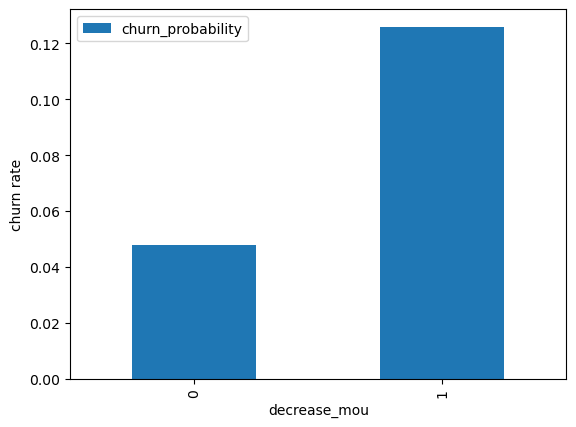

In [107]:
df_filter.pivot_table(values='churn_probability', index='decrease_mou', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

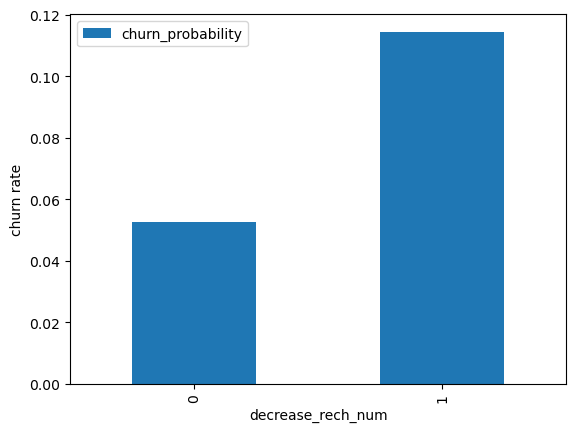

In [108]:

df_filter.pivot_table(values='churn_probability', index='decrease_rech_num', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

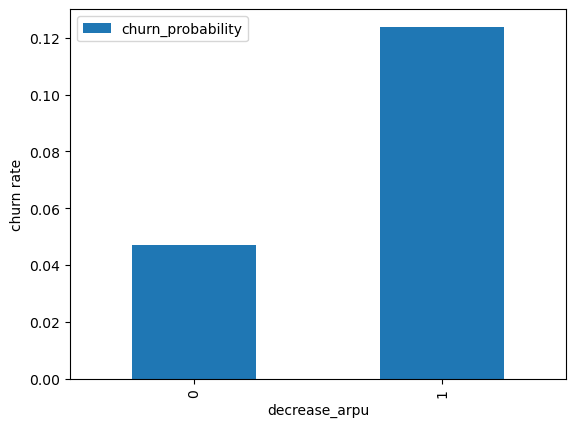

In [109]:
df_filter.pivot_table(values='churn_probability', index='decrease_arpu', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

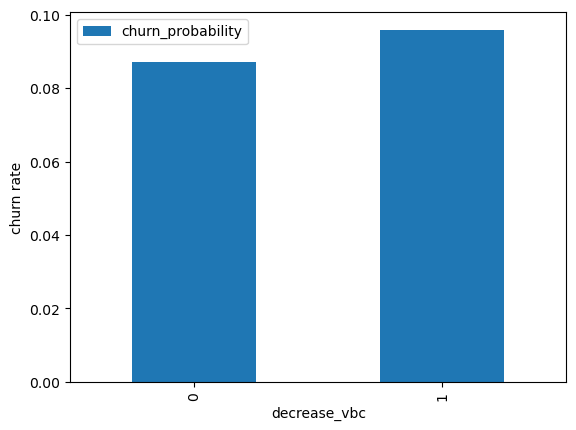

In [110]:
df_filter.pivot_table(values='churn_probability', index='decrease_vbc', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

# Analysis

1. We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase and same we see for number of rechanrges.
4. we see that he churn rate is more for the customers, whose volume based cost in action month is increased. This means the customers not doing the monthly recharge more when they are in the action phase.

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.scatterplot(df_filter.avg_rech_num, df_filter.avg_rech_amt_action)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

# Train-test Split

## Visualizing data

In [112]:
#%matplotlib inline               
#import matplotlib.pyplot as plt

#df.hist(bins=50,figsize=(50,50))

# in the above plot 